[View in Colaboratory](https://colab.research.google.com/github/NurikS/Image-classification/blob/master/cifar10.ipynb)

# Classifying images from cifar-10 dataset using Keras


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

Using TensorFlow backend.


In [0]:
# the size of the batch fed to the neural net
batch_size = 32
# number of classes in the dataset
nb_classes = 10
# number of epochs
nb_epoch = 25
# image size
img_rows, img_cols = 32, 32
# number of channels in an image: RGB
img_channels = 3
# labels in the dataset
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

## Data preprocessing

**Loading data**

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


**View data samples**

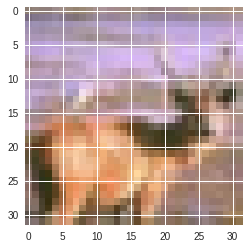

number of the class: [4]
Object: deer


In [7]:
n = 9000
plt.imshow(toimage(X_train[n]))
plt.show()
print("number of the class:", y_train[n])
print("Object:", classes[y_train[n][0]])

**Normalize the data**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Use one-hot encoding to convert the answer to categorical format**

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the model

In [0]:
# Create the sequential model
model = Sequential()
# First convolutional layer
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# First pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
model.add(Dropout(0.25))
# Flattening 2D representation 
model.add(Flatten())
# Fully connected layer
model.add(Dense(512, activation='relu'))
# Dropout layer
model.add(Dropout(0.5))
# Output layer
model.add(Dense(nb_classes, activation='softmax'))

**Info about our model**

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

**Compiling the model**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training the convolutional neural net

In [15]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 27s - loss: 1.5750 - acc: 0.4232 - val_loss: 1.2196 - val_acc: 0.5714
Epoch 2/25
 - 25s - loss: 1.1517 - acc: 0.5899 - val_loss: 0.9384 - val_acc: 0.6790
Epoch 3/25
 - 25s - loss: 0.9793 - acc: 0.6571 - val_loss: 0.8505 - val_acc: 0.7046
Epoch 4/25
 - 25s - loss: 0.8861 - acc: 0.6904 - val_loss: 0.7951 - val_acc: 0.7278
Epoch 5/25
 - 25s - loss: 0.8198 - acc: 0.7127 - val_loss: 0.7360 - val_acc: 0.7474
Epoch 6/25
 - 25s - loss: 0.7697 - acc: 0.7310 - val_loss: 0.8203 - val_acc: 0.7128
Epoch 7/25
 - 25s - loss: 0.7286 - acc: 0.7428 - val_loss: 0.6935 - val_acc: 0.7608
Epoch 8/25
 - 25s - loss: 0.6983 - acc: 0.7557 - val_loss: 0.6773 - val_acc: 0.7660
Epoch 9/25
 - 25s - loss: 0.6654 - acc: 0.7679 - val_loss: 0.6665 - val_acc: 0.7734
Epoch 10/25
 - 25s - loss: 0.6371 - acc: 0.7762 - val_loss: 0.6490 - val_acc: 0.7810
Epoch 11/25
 - 25s - loss: 0.6173 - acc: 0.7804 - val_loss: 0.6671 - val_acc: 0.7762
Epoch 12/25
 - 25s - loss

## Evaluate the model

In [33]:
# Evaluate the model on the test dataset
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy of the model on the test data: %.2f%%" % (scores[1]*100))

Accuracy of the model on the test data: 78.45%


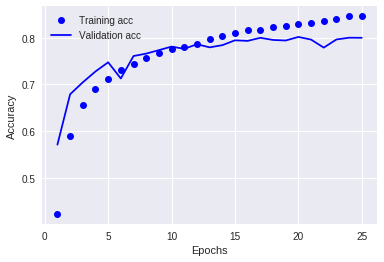

In [18]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Use the model to classify images

**View the test data sample**

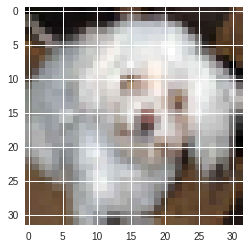

In [25]:
index=1000
plt.imshow(toimage(X_test[index]))
plt.show()

**Preprocessing the test image**

In [0]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Predict**

In [0]:
prediction = model.predict(x)

**Print out the prediction**

In [28]:
print(prediction)

[[9.5330703e-09 9.4136843e-10 2.6538866e-03 3.2751307e-02 2.8818353e-05
  9.6412700e-01 1.9284082e-05 4.1965861e-04 1.6019877e-09 1.2881378e-08]]


**Convert the answer from one-hot encoding to the class number**

In [29]:
prediction = np.argmax(prediction)
print(classes[prediction])

dog


**Print the answer**

In [32]:
print(classes[y_test[index][0]])

dog
